In [17]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
import pickle
import tensorflow as tf

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dty

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load the Images

In [2]:
def resizeImage(image,shape=(32,32)):
    """
    image should be a np.array image, note that it will be modified
    """
    ysize = image.shape[0]
    xsize = image.shape[1]

    # Resize image if necesaary
    if xsize != shape[0] and ysize != shape[1]:
        image = cv2.resize(image, (shape[0], shape[1]),)

    return image

In [3]:
### Load the images and plot them here.
images = glob.glob('extra_images/*')
test_images =  [];

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rgbimg = resizeImage(rgbimg)
    test_images.append(rgbimg)

New training examples:


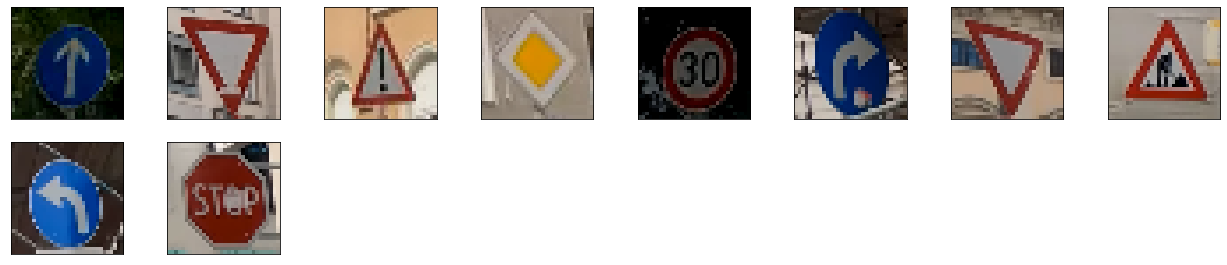

In [6]:
plt.figure(figsize=(22, 12))


for i in range(len(test_images)):
    plt.subplot(5, 8, 1+i)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(test_images[i], interpolation='nearest')
print("New training examples:")

# Helper to adapt images to full width
plt.show()

## Preprocess Images

In [11]:
def hisEqulColor(img):
    ycrcb=cv2.cvtColor(img,cv2.COLOR_RGB2YCR_CB)
    channels=cv2.split(ycrcb)
    cv2.equalizeHist(channels[0],channels[0])
    cv2.merge(channels,ycrcb)
    cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2RGB,img)
    return img

def cv2contrast_normalize(x_in):
    dst = np.zeros(x_in.shape) # setup destination matrix shape
    
    # Use list comprehension, adjust each image contrast to be between [0, 255]
    l = [cv2.normalize(x, dst, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) for x in x_in]
    
    return np.asarray(l)

New training examples:


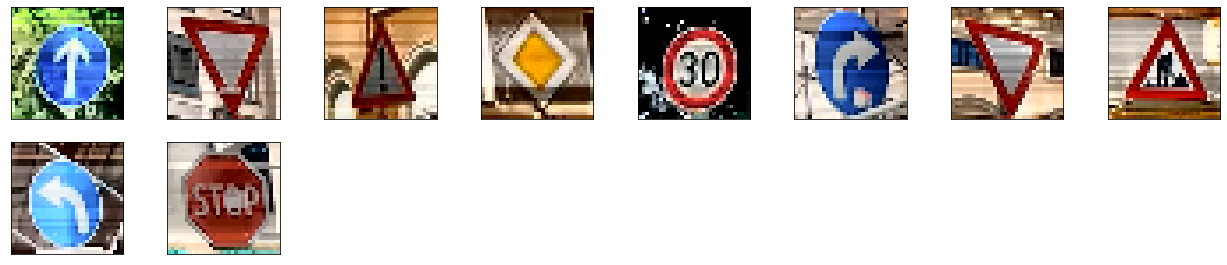

In [15]:
test_images_corrected =  []

plt.figure(figsize=(22, 12))
for i in range(len(test_images)):
    plt.subplot(5, 8, 1+i)
    plt.yticks([])
    plt.xticks([])
    corrected_img = hisEqulColor(cv2contrast_normalize(test_images[i]))
    plt.imshow(corrected_img, interpolation='nearest')
    test_images_corrected.append(corrected_img)
    
print("New training examples corrected:")

### Predict the Sign Type for Each Image

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    values, indices = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict = {x: rescaled_images, k: 1.0})
    for i in range(5):
        signname = ""
        for j in range(5):
            signname += classes[indices[i][j]] + ": " + str(values[i][j]) + "\n"
        plt.figure(figsize=(1, 1))
        plt.suptitle(signname, x = 1.1, y = 1.0, horizontalalignment = 'left')
        plt.imshow(images[i])

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#initialize variables in network

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    predictions = sess.run(tf.nn.top_k(predictions, k = 3), feed_dict = {x: test_images_corrected})
    print(predictions)

NameError: name 'saver' is not defined

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.